In [2]:
import requests
wiki_link="https://en.wikipedia.org/wiki/List_of_professional_sports_leagues_by_revenue"
#fetching the HTML page
link = requests.get(wiki_link).text


In [3]:
from bs4 import BeautifulSoup
#Storing the HTML page in Beautiful Soup format
soup=BeautifulSoup(link,'lxml')
#Obtain nested structure of soup
soup.prettify()
soup.title

<title>List of professional sports leagues by revenue - Wikipedia</title>

In [6]:
soup.title.string

'List of professional sports leagues by revenue - Wikipedia'

In [7]:
soup.find_all('table')

[<table class="wikitable sortable">
 <tbody><tr>
 <th>League
 </th>
 <th>Sport
 </th>
 <th>Country(ies)
 </th>
 <th>Season
 </th>
 <th><b>Level on pyramid</b>
 </th>
 <th data-sort-type="number">Teams<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[a]</a></sup>
 </th>
 <th data-sort-type="number">Revenue <br/> (€ mil)
 </th>
 <th data-sort-type="number">Rev. / team<br/>(€ mil)
 </th>
 <th>Ref.
 </th></tr>
 <tr>
 <td><a href="/wiki/National_Football_League" title="National Football League">National Football League</a></td>
 <td><a href="/wiki/American_football" title="American football">American football</a></td>
 <td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/23px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_the_United_

In [8]:
#finding the correct table
right_table=soup.find('table', class_='wikitable sortable')


In [9]:
all_links=right_table.find_all("a")
all_links

[<a href="#cite_note-1">[a]</a>,
 <a href="/wiki/National_Football_League" title="National Football League">National Football League</a>,
 <a href="/wiki/American_football" title="American football">American football</a>,
 <a href="/wiki/United_States" title="United States">United States</a>,
 <a href="/wiki/2017_NFL_season" title="2017 NFL season">2017</a>,
 <a href="#cite_note-2">[b]</a>,
 <a href="#cite_note-3">[1]</a>,
 <a href="/wiki/Major_League_Baseball" title="Major League Baseball">Major League Baseball</a>,
 <a href="/wiki/Baseball" title="Baseball">Baseball</a>,
 <a href="/wiki/United_States" title="United States">United States</a>,
 <a href="/wiki/Canada" title="Canada">Canada</a>,
 <a class="mw-redirect" href="/wiki/2018_MLB_season" title="2018 MLB season">2018</a>,
 <a href="#cite_note-4">[2]</a>,
 <a href="/wiki/National_Basketball_Association" title="National Basketball Association">National Basketball Association</a>,
 <a href="/wiki/Basketball" title="Basketball">Bask

In [10]:
for row in right_table.find_all("tr"):
    for col in row.find_all("td"):
        print(col)
    

<td><a href="/wiki/National_Football_League" title="National Football League">National Football League</a></td>
<td><a href="/wiki/American_football" title="American football">American football</a></td>
<td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="650" data-file-width="1235" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/23px-Flag_of_the_United_States.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_the_United_States.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/46px-Flag_of_the_United_States.svg.png 2x" width="23"/> </span><a href="/wiki/United_States" title="United States">United States</a></td>
<td><a href="/wiki/2017_NFL_season" title="2017 NFL season">2017</a>
</td>
<td>1</td>
<td>32</td>
<td><span data-sort-value="7004113940000000000♠">11,394</span><sup class="reference" id="cite_ref-

In [16]:
list_of_rows=[]

for row in right_table.find_all("tr"):
    list_of_cells=[]
    for cell in row.find_all(["th","td"]):
        text=cell.text
        list_of_cells.append(text)
    list_of_rows.append(list_of_cells)


In [17]:
league=[]
sport=[]
country=[]
season=[]
teams=[]
revenue=[]
for item in list_of_rows:
    league.append(item[0].rstrip('\n'))
    sport.append(item[1].rstrip('\n'))
    country.append(item[2].rstrip('\n'))
    season.append(item[3].rstrip('\n'))
    teams.append(item[5].rstrip('\n'))
    revenue.append(item[6].rstrip('\n'))



In [18]:
import pandas as pd

df2=pd.DataFrame({"League":league, "Sport":sport, "Country":country, "Season":season,"Teams":teams, "Revenue":revenue})

df2=df2.drop([0])


In [19]:
df2.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 90
Data columns (total 6 columns):
League     90 non-null object
Sport      90 non-null object
Country    90 non-null object
Season     90 non-null object
Teams      90 non-null object
Revenue    90 non-null object
dtypes: object(6)
memory usage: 4.9+ KB


In [20]:
df2.describe()

,League,Sport,Country,Season,Teams,Revenue
count,90,90,90,90,90,90
unique,90,13,60,16,17,83
top,NASCAR,Association football,Germany,2016–17,18,152
freq,1,58,6,36,15,2


In [21]:
#Converting the revenue column from string to float
df2.Revenue
Rev=[]
import re
for data in df2.Revenue:
    non_decimal = re.compile(r'[^\d.]+')
    data= non_decimal.sub('', data)
    Rev.append(data)
print(Rev)

['11394', '9200', '6271', '5340', '4338', '4152', '3814', '2267', '2108', '1830', '1644', '1298', '1253', '945', '860', '851', '842', '820', '813', '754', '731', '660.8', '633.62', '608', '563', '509', '509', '505', '431', '383', '338', '337.2', '326.8', '317.3', '276', '262', '254.61', '251.4', '232', '219', '209', '200', '179', '179', '176', '171', '168', '167', '155', '152', '152', '145', '118', '120', '119.7', '118', '113.7', '113', '111', '108', '107.3', '106', '103', '96.4', '95', '94.0', '89', '89', '72', '74', '71', '63', '61', '60', '58.8', '53', '65', '60', '42', '41', '40', '35', '34', '32', '32', '30.1', '28.3', '25', '23', '20']


In [22]:
import numpy as np
indices= np.arange(1,91,1)
rev_df=pd.DataFrame({"Revenue":Rev}, index=indices)

df2.Revenue=rev_df
df2

,League,Sport,Country,Season,Teams,Revenue
1,National Football League,American football,United States,2017,32,11394
2,Major League Baseball,Baseball,United States Canada,2018,30,9200
3,National Basketball Association,Basketball,United States Canada,2017–18,30,6271
4,Premier League,Association football,England Wales[c],2016–17,20,5340
5,National Hockey League,Ice Hockey,United States Canada,2017–18,31,4338
6,La Liga,Association football,Spain,2017–18,20,4152
7,Bundesliga,Association football,Germany,2017–18,18,3814
8,Serie A,Association football,Italy,2016–17,20,2267
9,UEFA Champions League,Association football,Europe,2017–18 UEFA Champions League,32,2108
10,Formula One,Auto racing,Worldwide,2017,10,1830


In [23]:
type(df2.Revenue)

pandas.core.series.Series

In [24]:
df2.Revenue=df2.Revenue.astype(float)

In [25]:
type(df2.Revenue)

pandas.core.series.Series

In [26]:
df2.describe()

,Revenue
count,90.000000
mean,821.289222
std,1837.883064
min,20.000000
25%,89.000000
50%,173.500000
75%,627.215000
max,11394.000000


In [27]:
df2["Revenue"].mean()

821.2892222222224

Text(0,0.5,'Revenue')

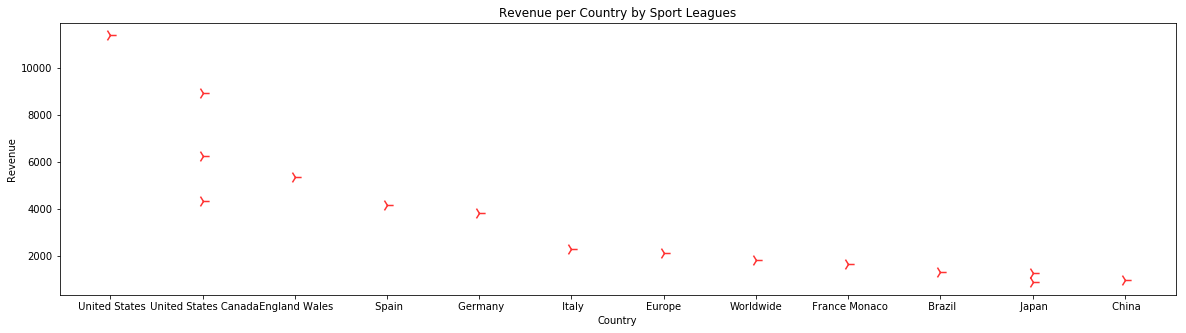

In [208]:
#plotting league vs revenue
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(20,5))
plt.scatter(df2["Country"].head(15),df2["Revenue"].head(15),s=150,edgecolors="blue", color="r",alpha=0.8,marker="4")
plt.title("Revenue per Country by Sport Leagues")
plt.xlabel("Country")
plt.ylabel("Revenue")
